<a href="https://colab.research.google.com/github/JaviLaura/Master-Project-COVID-19-Analysis-pandas-seaborn-matplotlib-/blob/main/DS12_Project_1_Master_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<img src="https://static.junilearning.com/images/juni_logo.png" height=75 align=center hspace="5px"> **DS12 Project 1: Master Project**

Create your own EDA from scratch! Start by picking a research topic that interests you, and then formulate a few specific research questions that you would like to answer. Pick an appropriate dataset. Then, using a combination of statistics and at least three plots, answer your questions! Make sure to write out your findings in a clear and concise way. <br><br>

**Resources for datasets:**

Downloadable Files: 
* Kaggle: https://www.kaggle.com/datasets
* FiveThirtyEight: https://data.fivethirtyeight.com/
* BuzzFeedNews: https://github.com/BuzzFeedNews
* Data.gov: https://www.data.gov/
* NASA Earth Science: https://earthdata.nasa.gov/
* NASA Space: https://pds.nasa.gov/datasearch/data-search/

Public Web APIs: 
* Curated List: https://github.com/public-apis/public-apis
* Searchable Directory: https://www.programmableweb.com/apis/directory<br>

Or use anything else you can find online!

In [ ]:
#Explanatory Data Analysis

Which countries ("location") had the higest "stringency_index"? China for the most part had the highest stringency index.

 
STRINGENCY INDEX:
The nine metrics used to calculate the Stringency Index are: school closures; workplace closures; cancellation of public events; restrictions on public gatherings; closures of public transport; stay-at-home requirements; public information campaigns; restrictions on internal movements; and international travel controls.

The index on any given day is calculated as the mean score of the nine metrics, each taking a value between 0 and 100. See the authors’ full description of how this index is calculated.

A higher score indicates a stricter response (i.e. 100 = strictest response). If policies vary at the subnational level, the index is shown as the response level of the strictest sub-region.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
intlCovidDF = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
display(intlCovidDF)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293564,ZWE,Africa,Zimbabwe,2023-03-03,264127.0,0.0,11.571,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
293565,ZWE,Africa,Zimbabwe,2023-03-04,264127.0,0.0,4.571,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
293566,ZWE,Africa,Zimbabwe,2023-03-05,264127.0,0.0,2.714,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
293567,ZWE,Africa,Zimbabwe,2023-03-06,264127.0,0.0,0.000,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
intlCovidDF.isnull().sum()

iso_code                                        0
continent                                   13955
location                                        0
date                                            0
total_cases                                 35584
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       283535
excess_mortality_cumulative                283535
excess_mortality                           283535
excess_mortality_cumulative_per_million    283535
Length: 67, dtype: int64

In [ ]:


locationCounts = intlCovidDF["location"].value_counts()
display(locationCounts)

#There are 243 countries.
#ISO with OWID, HIC, UMC, 
#Rows with mislaebeled location: International, Upper middle income, High income, Lower middle income, European Union


Argentina          1165
Germany            1164
Austria            1164
Czechia            1164
South America      1164
                   ... 
England            1084
Wales              1061
Macao               760
Northern Cyprus     691
Western Sahara        1
Name: location, Length: 255, dtype: int64

In [ ]:
#Get average stringency_index for each year per country
#Make list of all countries. Loop through the list.
#Refer to the df, and start calculating the mean.

countriesList = locationCounts.keys()

print(countriesList)

#countriesList.remove("International")
#countriesList.remove("Upper middle income")
#countriesList.remove("High income")
#countriesList.remove("Lower middle income")
#countriesList.remove("European Union")

removeList = ["Upper middle income", "High income", "Lower middle income", "European Union"]

countriesList = countriesList.drop(removeList)

newCols = ["location","mean_stringency_index","SI for 2020","SI for 2021","SI for 2022","SI for 2023"]

newIntlCovidDF = pd.DataFrame()

#for i in countriesList:
  #for location in intlCovidDF["location"]:

Index(['Argentina', 'Germany', 'Austria', 'Czechia', 'South America', 'Israel',
       'Italy', 'Serbia', 'High income', 'Brazil',
       ...
       'Suriname', 'Taiwan', 'Hong Kong', 'Northern Ireland', 'Scotland',
       'England', 'Wales', 'Macao', 'Northern Cyprus', 'Western Sahara'],
      dtype='object', length=255)


In [ ]:
newIntlCovidDF = pd.DataFrame()
newIntlCovidDF["Country"] = intlCovidDF["location"]
newIntlCovidDF["Date"] = intlCovidDF["date"]
newIntlCovidDF["Stringency_Index"] = intlCovidDF["stringency_index"]
newIntlCovidDF["Life_Expectancy"] = intlCovidDF["life_expectancy"]

#Converting to datetime format
newIntlCovidDF["Date"] = pd.to_datetime(newIntlCovidDF["Date"])

display(newIntlCovidDF)

newIntlCovidDF.info()

,Country,Date,Stringency_Index,Life_Expectancy
0,Afghanistan,2020-01-03,NaN,64.83
1,Afghanistan,2020-01-04,NaN,64.83
2,Afghanistan,2020-01-05,NaN,64.83
3,Afghanistan,2020-01-06,NaN,64.83
4,Afghanistan,2020-01-07,NaN,64.83
...,...,...,...,...
293564,Zimbabwe,2023-03-03,NaN,61.49
293565,Zimbabwe,2023-03-04,NaN,61.49
293566,Zimbabwe,2023-03-05,NaN,61.49
293567,Zimbabwe,2023-03-06,NaN,61.49


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293569 entries, 0 to 293568
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Country           293569 non-null  object        
 1   Date              293569 non-null  datetime64[ns]
 2   Stringency_Index  193194 non-null  float64       
 3   Life_Expectancy   269950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 9.0+ MB


In [ ]:
newIntlCovidDF = newIntlCovidDF.dropna()
display(newIntlCovidDF)

newIntlCovidDF.info()

,Country,Date,Stringency_Index,Life_Expectancy
19,Afghanistan,2020-01-22,0.0,64.83
20,Afghanistan,2020-01-23,0.0,64.83
21,Afghanistan,2020-01-24,0.0,64.83
22,Afghanistan,2020-01-25,0.0,64.83
23,Afghanistan,2020-01-26,0.0,64.83
...,...,...,...,...
293498,Zimbabwe,2022-12-27,53.7,61.49
293499,Zimbabwe,2022-12-28,53.7,61.49
293500,Zimbabwe,2022-12-29,53.7,61.49
293501,Zimbabwe,2022-12-30,53.7,61.49


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192119 entries, 19 to 293502
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Country           192119 non-null  object        
 1   Date              192119 non-null  datetime64[ns]
 2   Stringency_Index  192119 non-null  float64       
 3   Life_Expectancy   192119 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.3+ MB


In [ ]:
covidDict = {}

for i in countriesList:
  covidDict[i] = newIntlCovidDF[newIntlCovidDF["Country"] == i]

covidDict["Peru"].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 204407 to 205481
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           1075 non-null   object        
 1   Date              1075 non-null   datetime64[ns]
 2   Stringency_Index  1075 non-null   float64       
 3   Life_Expectancy   1075 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 42.0+ KB


In [ ]:
#Key shown is the country, and it also displays Date and Stringency
print(covidDict)

{'Argentina':          Country       Date  Stringency_Index  Life_Expectancy
10461  Argentina 2020-01-22              0.00            76.67
10462  Argentina 2020-01-23             11.11            76.67
10463  Argentina 2020-01-24             11.11            76.67
10464  Argentina 2020-01-25             11.11            76.67
10465  Argentina 2020-01-26             11.11            76.67
...          ...        ...               ...              ...
11531  Argentina 2022-12-27             14.38            76.67
11532  Argentina 2022-12-28             14.38            76.67
11533  Argentina 2022-12-29             14.38            76.67
11534  Argentina 2022-12-30             14.38            76.67
11535  Argentina 2022-12-31             14.38            76.67

[1075 rows x 4 columns], 'Germany':        Country       Date  Stringency_Index  Life_Expectancy
95118  Germany 2020-01-22              0.00            81.33
95119  Germany 2020-01-23              0.00            81.33
95120  Ger

In [ ]:
print(covidDict["Mexico"])

print(covidDict["Mexico"]["Date"])

       Country       Date  Stringency_Index  Life_Expectancy
164333  Mexico 2020-01-22              0.00            75.05
164334  Mexico 2020-01-23              0.00            75.05
164335  Mexico 2020-01-24              0.00            75.05
164336  Mexico 2020-01-25              0.00            75.05
164337  Mexico 2020-01-26              0.00            75.05
...        ...        ...               ...              ...
165403  Mexico 2022-12-27             17.59            75.05
165404  Mexico 2022-12-28             17.59            75.05
165405  Mexico 2022-12-29             17.59            75.05
165406  Mexico 2022-12-30             17.59            75.05
165407  Mexico 2022-12-31             17.59            75.05

[1075 rows x 4 columns]
164333   2020-01-22
164334   2020-01-23
164335   2020-01-24
164336   2020-01-25
164337   2020-01-26
            ...    
165403   2022-12-27
165404   2022-12-28
165405   2022-12-29
165406   2022-12-30
165407   2022-12-31
Name: Date, Length: 107

In [ ]:
date_2020 = dt.datetime(2020,1,1)
date_2021 = dt.datetime(2021,1,1)
date_2022 = dt.datetime(2022,1,1)
date_2023 = dt.datetime(2023,1,1)
date_2024 = dt.datetime(2024,1,1)

yearDF = pd.DataFrame(columns = ["country","Stringency Mean 2020","Stringency Mean 2021","Stringency Mean 2022","Life Expectancy Mean 2020","Life Expectancy Mean 2021","Life Expectancy Mean 2022"])

#This is looping through each country
for country in covidDict:
  row = {"country":"","Stringency Mean 2020":"","Stringency Mean 2021":"","Stringency Mean 2022":"","Life Expectancy Mean 2020":"","Life Expectancy Mean 2021":"","Life Expectancy Mean 2022":""} 
  row["country"] = country
  sum2020 = 0
  sum2021 = 0
  sum2022 = 0
  count2020 = 0
  count2021 = 0
  count2022 = 0
  lifeExpectSum2020 = 0
  lifeExpectSum2021 = 0
  lifeExpectSum2022 = 0


  #Looping through each date of each specific country
  for i in range(len(covidDict[country]["Date"])):
    #Accessing current date we are looping through and its associated stringency index
    curDate = covidDict[country].iloc[i,1]
    specificStringency = covidDict[country].iloc[i,2]
    curLifeExpect = covidDict[country].iloc[i,3]
    #2020 dates
    if curDate >= date_2020 and curDate < date_2021:
      count2020 += 1
      sum2020 += specificStringency
      lifeExpectSum2020 += curLifeExpect
    #2021 dates
    elif curDate >= date_2021 and curDate < date_2022:
      count2021 += 1
      sum2021 += specificStringency
      lifeExpectSum2021 += curLifeExpect
    #2022 dates
    elif curDate >= date_2022 and curDate < date_2023:
      count2022 += 1
      sum2022 += specificStringency
      lifeExpectSum2022 += curLifeExpect


  #This is ruling out counts and means that are 0.  
  if count2020 == 0:
    row["Stringency Mean 2020"] = 0
    row["Life Expectancy Mean 2020"] = 0
  else:
    row["Stringency Mean 2020"] = sum2020/count2020
    row["Life Expectancy Mean 2020"] = lifeExpectSum2020/count2020
  if count2021 == 0:
    row["Stringency Mean 2021"] = 0
    row["Life Expectancy Mean 2021"] = 0
  else:
    row["Stringency Mean 2021"] = sum2021/count2021
    row["Life Expectancy Mean 2021"] = lifeExpectSum2021/count2021
  if count2022 == 0:
    row["Stringency Mean 2022"] = 0
    row["Life Expectancy Mean 2022"] = 0
  else:
    row["Stringency Mean 2022"] = sum2022/count2022
    row["Life Expectancy Mean 2022"] = lifeExpectSum2022/count2022



  yearDF = yearDF.append(row,ignore_index=True)

display(yearDF)

,country,Stringency Mean 2020,Stringency Mean 2021,Stringency Mean 2022,Life Expectancy Mean 2020,Life Expectancy Mean 2021,Life Expectancy Mean 2022
0,Argentina,75.709507,66.841315,19.031068,76.67,76.67,76.67
1,Germany,54.966609,61.776000,24.624082,81.33,81.33,81.33
2,Austria,49.930058,61.547863,38.631562,81.54,81.54,81.54
3,Czechia,47.502841,55.170521,18.499452,79.38,79.38,79.38
4,South America,0.000000,0.000000,0.000000,0.00,0.00,0.00
...,...,...,...,...,...,...,...
246,England,0.000000,0.000000,0.000000,0.00,0.00,0.00
247,Wales,0.000000,0.000000,0.000000,0.00,0.00,0.00
248,Macao,0.000000,27.908593,43.130658,0.00,84.24,84.24
249,Northern Cyprus,0.000000,0.000000,0.000000,0.00,0.00,0.00


In [ ]:
yearDF = yearDF[yearDF["Stringency Mean 2020" ] != 0]
display(yearDF)

,country,Stringency Mean 2020,Stringency Mean 2021,Stringency Mean 2022,Life Expectancy Mean 2020,Life Expectancy Mean 2021,Life Expectancy Mean 2022
0,Argentina,75.709507,66.841315,19.031068,76.67,76.67,76.67
1,Germany,54.966609,61.776000,24.624082,81.33,81.33,81.33
2,Austria,49.930058,61.547863,38.631562,81.54,81.54,81.54
3,Czechia,47.502841,55.170521,18.499452,79.38,79.38,79.38
5,Israel,61.580754,51.760849,20.001589,82.97,82.97,82.97
...,...,...,...,...,...,...,...
238,Zimbabwe,64.785072,61.884932,51.833918,61.49,61.49,61.49
240,Guinea,56.479739,61.463562,43.577890,61.60,61.60,61.60
241,Suriname,62.463459,72.945808,30.857425,71.68,71.68,71.68
242,Taiwan,24.971333,40.874685,24.676575,80.46,80.46,80.46


In [ ]:
yearDF["Overall Mean"] = (yearDF["Stringency Mean 2020"] + yearDF["Stringency Mean 2021"] + yearDF["Stringency Mean 2022"])/3

display(yearDF)

,country,Stringency Mean 2020,Stringency Mean 2021,Stringency Mean 2022,Life Expectancy Mean 2020,Life Expectancy Mean 2021,Life Expectancy Mean 2022,Overall Mean
0,Argentina,75.709507,66.841315,19.031068,76.67,76.67,76.67,53.860630
1,Germany,54.966609,61.776000,24.624082,81.33,81.33,81.33,47.122230
2,Austria,49.930058,61.547863,38.631562,81.54,81.54,81.54,50.036494
3,Czechia,47.502841,55.170521,18.499452,79.38,79.38,79.38,40.390938
5,Israel,61.580754,51.760849,20.001589,82.97,82.97,82.97,44.447731
...,...,...,...,...,...,...,...,...
238,Zimbabwe,64.785072,61.884932,51.833918,61.49,61.49,61.49,59.501307
240,Guinea,56.479739,61.463562,43.577890,61.60,61.60,61.60,53.840397
241,Suriname,62.463459,72.945808,30.857425,71.68,71.68,71.68,55.422231
242,Taiwan,24.971333,40.874685,24.676575,80.46,80.46,80.46,30.174198


[Text(0.5, 1.0, 'Overall Mean by Country')]

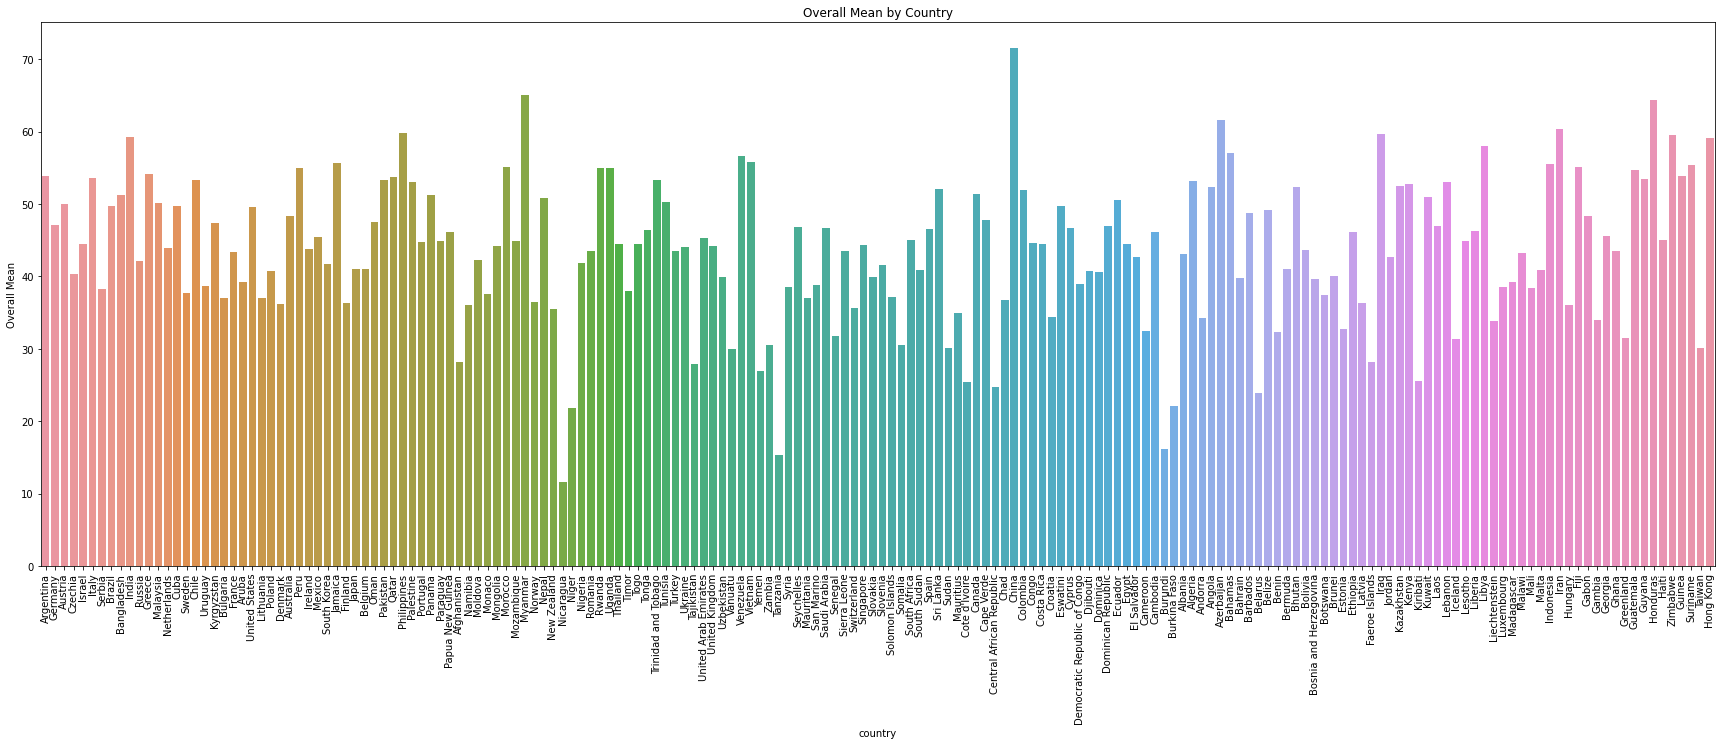

In [ ]:
#Barplot for Overall Mean by Country:

plt.figure().set_size_inches(30,10)
plt.xticks(rotation=90)
sns.barplot(y="Overall Mean",x="country",data=yearDF).set(title="Overall Mean by Country")


The graph above shows China as having the highest overall stringency index during the three years of the pandemic. It is followed by Honduras and Myanmar.The country with the lowest stringency index was Nicaragua. There is no evidence that an entire region performed better or worse for stringency index.

[Text(0.5, 1.0, 'Mean 2020 by Country')]

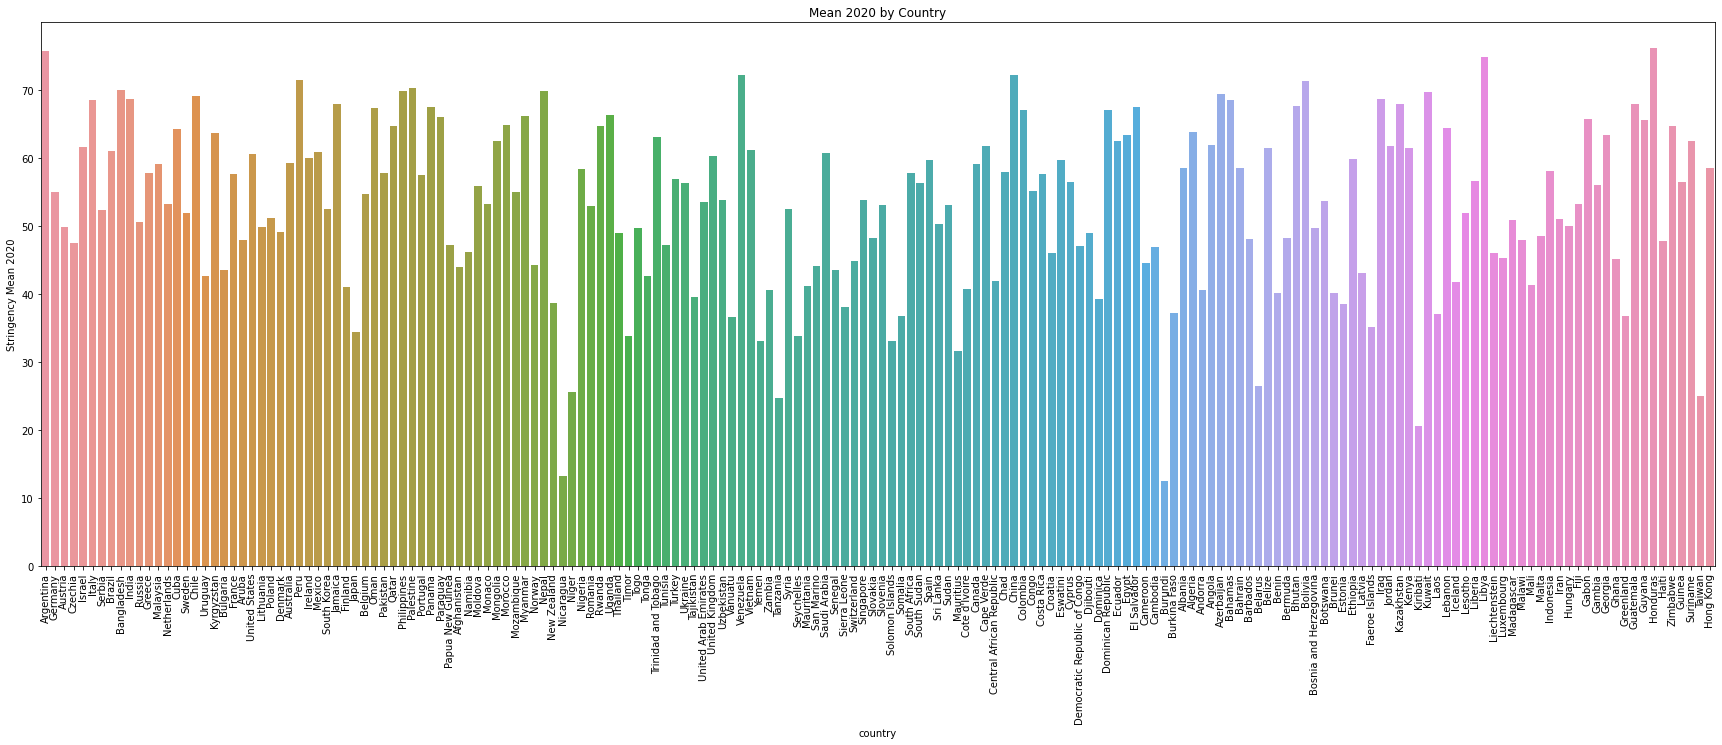

In [ ]:
#Barplot for Mean 2020

plt.figure().set_size_inches(30,10)
plt.xticks(rotation=90)
sns.barplot(y="Stringency Mean 2020",x="country",data=yearDF).set(title="Mean 2020 by Country")

During 2020, Honduras had the highest stringency index, followed by Libya and Venezuela. The country with the lowest stringency index was Nicaragua. 

[Text(0.5, 1.0, 'Mean 2021 by Country')]

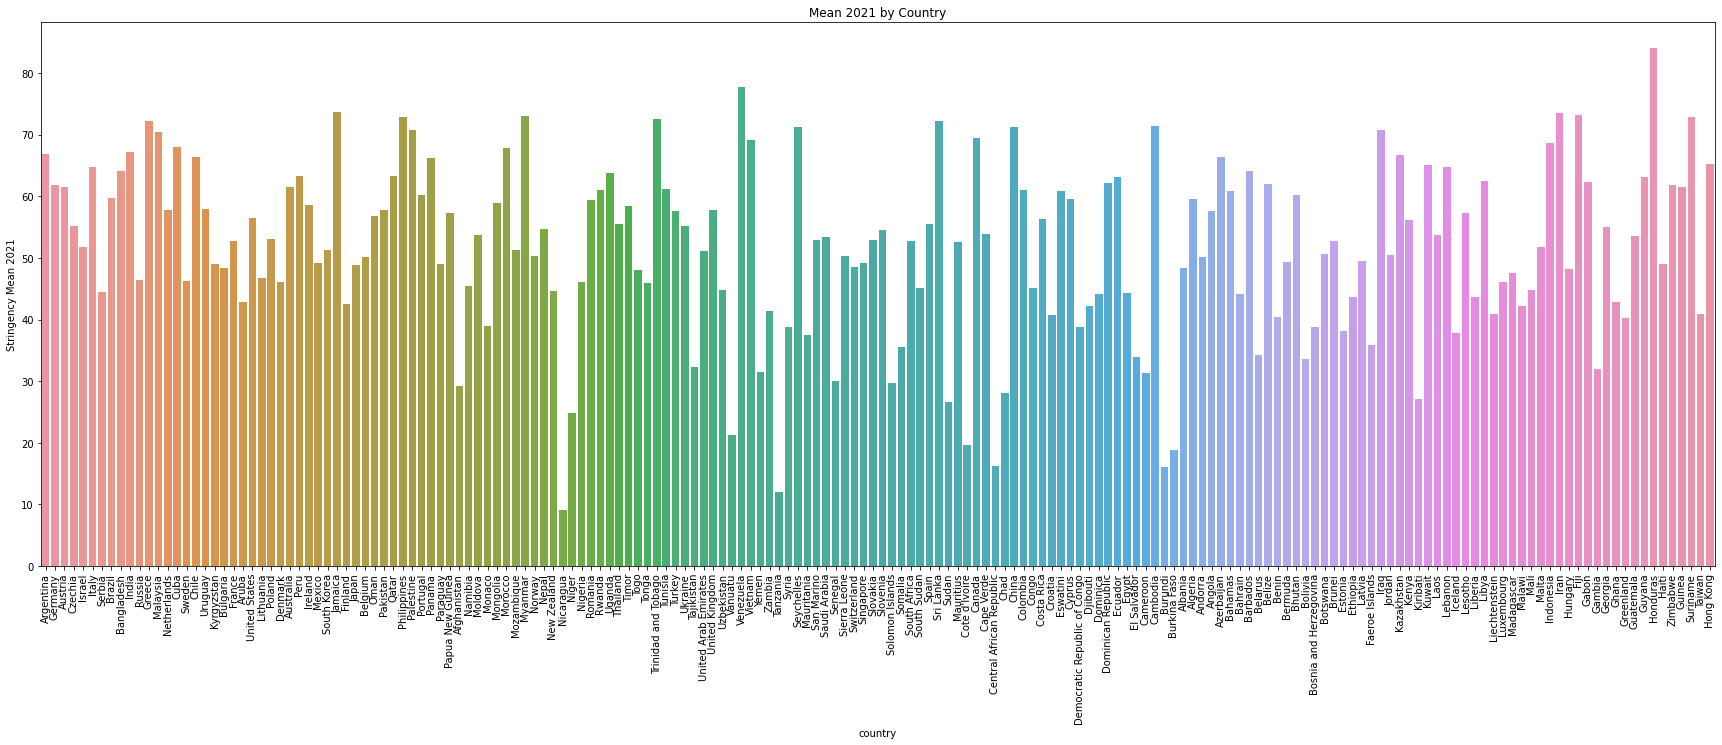

In [ ]:
#Barplot for Mean 2021

plt.figure().set_size_inches(30,10)
plt.xticks(rotation=90)
sns.barplot(y="Stringency Mean 2021",x="country",data=yearDF).set(title="Mean 2021 by Country")

During 2021, the country with the highest stringency index was Honduras, followed by Myanmar and Jamaica. The country with the lowest stringency index was Nicaragua.

[Text(0.5, 1.0, 'Mean 2022 by Country')]

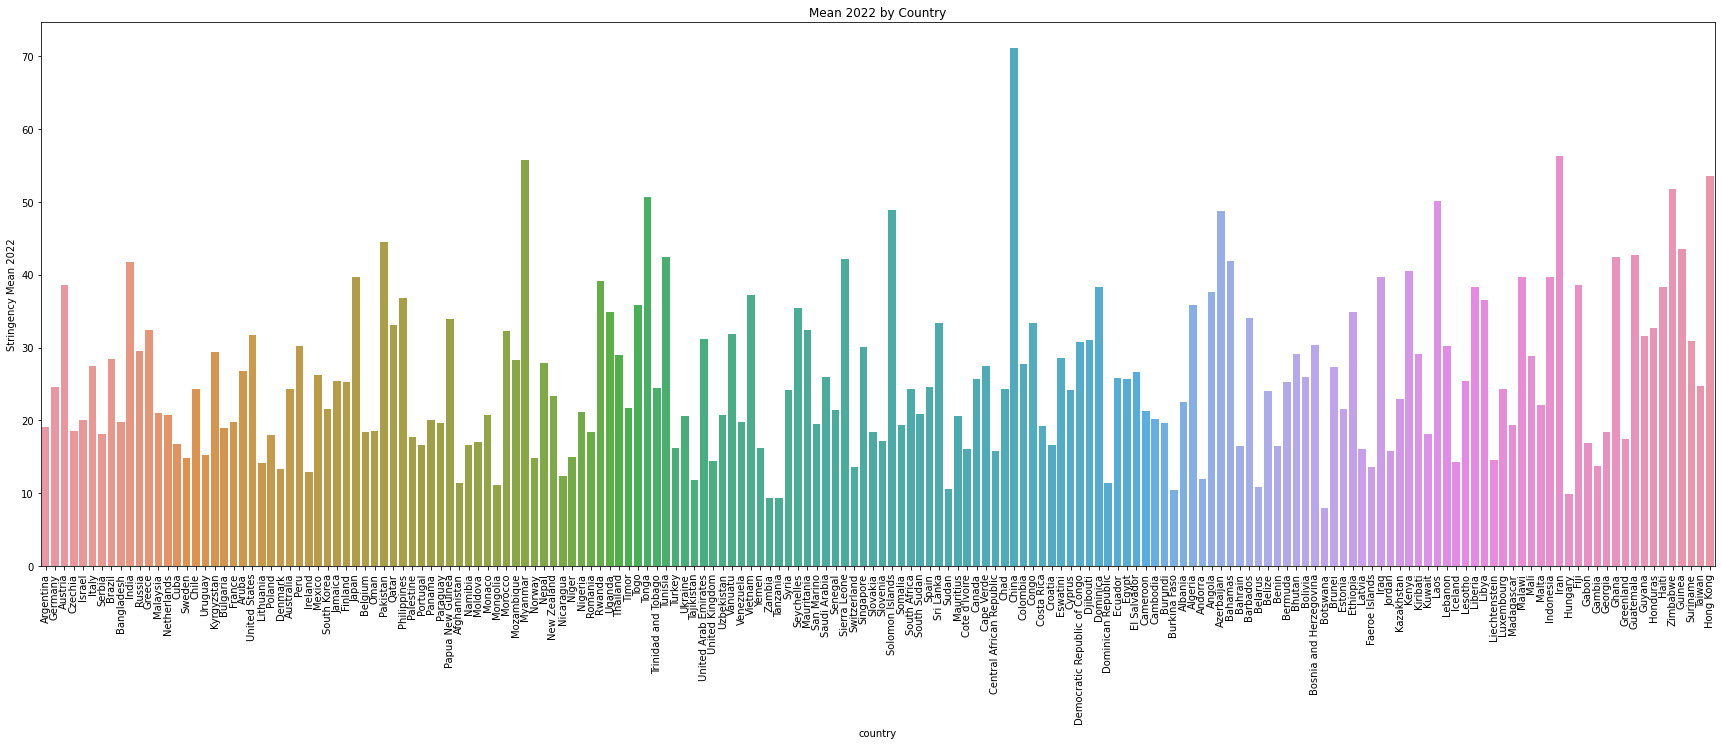

In [ ]:
#Barplot for Mean 2022

plt.figure().set_size_inches(30,10)
plt.xticks(rotation=90)
sns.barplot(y="Stringency Mean 2022",x="country",data=yearDF).set(title="Mean 2022 by Country")

During 2022, the country with the highest stringency index was China, followed by Iran and Malawi. The country with the lowest stringency index was Botswana.

**Overall conclusion**:

The countries that had the highest stringency indices were all developing nations. This may due to developing nations having significantly more experience with communicable disease compared to developed nations.

China's culture is quite different than US culture for example, where a significant part of the population opposed wearing masks, citing that it should be up to each person to decide. 

In [ ]:
covidChina = pd.DataFrame()



covidChina["Location"] = intlCovidDF["location"]
covidChina["Date"] = pd.to_datetime(intlCovidDF["date"])
covidChina["Stringency Index"] = intlCovidDF["stringency_index"]
covidChina["Total Deaths"] = intlCovidDF["total_deaths"]

covidChina = covidChina[covidChina["Location"] == "China"]

covidChina = covidChina.dropna()

display(covidChina)

covidChina.info()

,Location,Date,Stringency Index,Total Deaths
51092,China,2020-01-22,26.39,17.0
51093,China,2020-01-23,44.91,18.0
51094,China,2020-01-24,44.91,26.0
51095,China,2020-01-25,47.69,42.0
51096,China,2020-01-26,69.91,56.0
...,...,...,...,...
52162,China,2022-12-27,47.69,38995.0
52163,China,2022-12-28,47.69,40389.0
52164,China,2022-12-29,47.69,41805.0
52165,China,2022-12-30,47.69,43650.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 51092 to 52166
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          1075 non-null   object        
 1   Date              1075 non-null   datetime64[ns]
 2   Stringency Index  1075 non-null   float64       
 3   Total Deaths      1075 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 42.0+ KB


In [ ]:
jan2020 = dt.datetime(2020,1,1)
feb2020 = dt.datetime(2020,2,1)
mar2020 = dt.datetime(2020,3,1)
apr2020 = dt.datetime(2020,4,1)
may2020 = dt.datetime(2020,5,1)
jun2020 = dt.datetime(2020,6,1)
jul2020 = dt.datetime(2020,7,1)
aug2020 = dt.datetime(2020,8,1)
sep2020 = dt.datetime(2020,9,1)
oct2020 = dt.datetime(2020,10,1)
nov2020 = dt.datetime(2020,11,1)
dec2020 = dt.datetime(2020,12,1)
jan2021 = dt.datetime(2021,1,1)



covidChinaJan2020 = covidChina[(covidChina['Date'] >= jan2020) & (covidChina['Date']<feb2020)]
covidChinaFeb2020 = covidChina[(covidChina['Date'] >= feb2020) & (covidChina['Date']<mar2020)]
covidChinaMar2020 = covidChina[(covidChina['Date'] >= mar2020) & (covidChina['Date']<apr2020)]
covidChinaApr2020 = covidChina[(covidChina['Date'] >= apr2020) & (covidChina['Date']<may2020)]
covidChinaMay2020 = covidChina[(covidChina['Date'] >= may2020) & (covidChina['Date']<jun2020)]
covidChinaJun2020 = covidChina[(covidChina['Date'] >= jun2020) & (covidChina['Date']<jul2020)]
covidChinaJul2020 = covidChina[(covidChina['Date'] >= jul2020) & (covidChina['Date']<aug2020)]
covidChinaAug2020 = covidChina[(covidChina['Date'] >= aug2020) & (covidChina['Date']<sep2020)]
covidChinaSep2020 = covidChina[(covidChina['Date'] >= sep2020) & (covidChina['Date']<oct2020)]
covidChinaOct2020 = covidChina[(covidChina['Date'] >= oct2020) & (covidChina['Date']<nov2020)]
covidChinaNov2020 = covidChina[(covidChina['Date'] >= nov2020) & (covidChina['Date']<dec2020)]
covidChinaDec2020 = covidChina[(covidChina['Date'] >= dec2020) & (covidChina['Date']<jan2021)]



covidChinaMonths = [covidChinaJan2020,covidChinaFeb2020,covidChinaMar2020,covidChinaApr2020,covidChinaMay2020,covidChinaJun2020,covidChinaJul2020,covidChinaAug2020,covidChinaSep2020,covidChinaOct2020,covidChinaNov2020,covidChinaDec2020]

China2020MeanDeath = []

China2020StringencyMean = []

for month in covidChinaMonths:
  x = month["Total Deaths"].mean()
  China2020MeanDeath.append(x)
  y = month["Stringency Index"].mean()
  China2020StringencyMean.append(y)

print(China2020MeanDeath)
print(China2020StringencyMean)

[88.9, 1601.0689655172414, 3178.2258064516127, 3905.633333333333, 4644.129032258064, 4645.733333333334, 4652.709677419355, 4703.774193548387, 4740.966666666666, 4746.0, 4748.433333333333, 4764.322580645161]
[58.33599999999999, 76.99275862068964, 79.52645161290324, 60.21300000000001, 74.68193548387097, 78.48666666666664, 78.23999999999995, 78.23999999999995, 60.09266666666668, 63.065806451612914, 69.477, 79.0754838709677]


In [ ]:
jan2020AvgDeaths = covidChinaJan2020["Total Deaths"].mean()
print(jan2020AvgDeaths)

88.9


<AxesSubplot:xlabel='Date', ylabel='Total Deaths'>

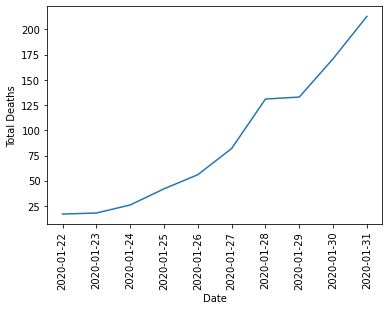

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(x = "Date", y = "Total Deaths", data = covidChinaJan2020)

In [ ]:
#New df that has the months in one col, their average deaths in another col, their avg stringency for that month in another col.
China2020Summary = pd.DataFrame()
China2020Summary["Month"] = ["January","February","March","April","May","June","July","August","September","October","November","December"]
China2020Summary["Mean Deaths"] = China2020MeanDeath
China2020Summary["Mean Stringency Index"] = China2020StringencyMean

display(China2020Summary)

,Month,Mean Deaths,Mean Stringency Index
0,January,88.900000,58.336000
1,February,1601.068966,76.992759
2,March,3178.225806,79.526452
3,April,3905.633333,60.213000
4,May,4644.129032,74.681935
5,June,4645.733333,78.486667
6,July,4652.709677,78.240000
7,August,4703.774194,78.240000
8,September,4740.966667,60.092667
9,October,4746.000000,63.065806


[Text(0.5, 1.0, 'China Mean Deaths 2020')]

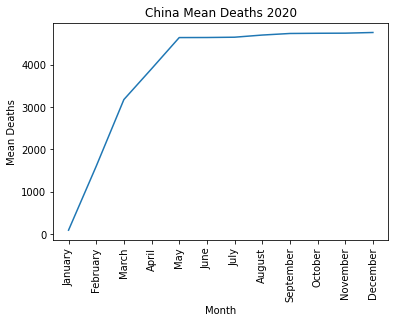

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(x = "Month", y = "Mean Deaths", data = China2020Summary).set(title="China Mean Deaths 2020")

[Text(0.5, 1.0, 'China Mean Stringency Index 2020')]

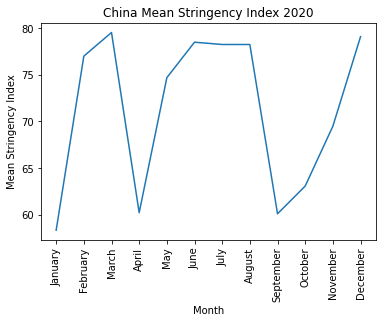

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(x = "Month", y = "Mean Stringency Index", data = China2020Summary).set(title="China Mean Stringency Index 2020")

In [ ]:
#Create function for year and country.

#Inputs: Country and year
#Output: Produce 2 line plots.

def covidSummaryYearPlot(year,countryName):
  #Specifying the country
  countryDF = pd.DataFrame()
  countryDF["Location"] = intlCovidDF["location"]
  countryDF["Date"] = pd.to_datetime(intlCovidDF["date"])
  countryDF["Stringency Index"] = intlCovidDF["stringency_index"]
  countryDF["Total Deaths"] = intlCovidDF["total_deaths"]
  countryDF = countryDF[countryDF["Location"] == countryName]
  countryDF = countryDF.dropna()
  #Converting to datetime
  jan = dt.datetime(year,1,1)
  feb = dt.datetime(year,2,1)
  mar = dt.datetime(year,3,1)
  apr = dt.datetime(year,4,1)
  may = dt.datetime(year,5,1)
  jun = dt.datetime(year,6,1)
  jul = dt.datetime(year,7,1)
  aug = dt.datetime(year,8,1)
  sep = dt.datetime(year,9,1)
  oct = dt.datetime(year,10,1)
  nov = dt.datetime(year,11,1)
  dec = dt.datetime(year,12,1)
  jan2 = dt.datetime(year + 1,1,1)
  #Creating dataframes for each month and specific year
  janDF = countryDF[(countryDF['Date'] >= jan) & (countryDF['Date'] < feb)]
  febDF = countryDF[(countryDF['Date'] >= feb) & (countryDF['Date'] < mar)]
  marDF = countryDF[(countryDF['Date'] >= mar) & (countryDF['Date'] < apr)]
  aprDF = countryDF[(countryDF['Date'] >= apr) & (countryDF['Date'] < may)]
  mayDF = countryDF[(countryDF['Date'] >= may) & (countryDF['Date'] < jun)]
  junDF = countryDF[(countryDF['Date'] >= jun) & (countryDF['Date'] < jul)]
  julDF = countryDF[(countryDF['Date'] >= jul) & (countryDF['Date'] < aug)]
  augDF = countryDF[(countryDF['Date'] >= aug) & (countryDF['Date'] < sep)]
  sepDF = countryDF[(countryDF['Date'] >= sep) & (countryDF['Date'] < oct)]
  octDF = countryDF[(countryDF['Date'] >= oct) & (countryDF['Date'] < nov)]
  novDF = countryDF[(countryDF['Date'] >= nov) & (countryDF['Date'] < dec)]
  decDF = countryDF[(countryDF['Date'] >= dec) & (countryDF['Date'] < jan2)]
  #List of all the newly created dataframes
  covidMonths = [janDF,febDF,marDF,aprDF,mayDF,junDF,julDF,augDF,sepDF,octDF,novDF,decDF]

  CountryYearMeanDeath = []
  CountryYearStringencyMean = []
  #Loop iterating through covidMonths
  for month in covidMonths:
    x = month["Total Deaths"].mean()
    CountryYearMeanDeath.append(x)
    y = month["Stringency Index"].mean()
    CountryYearStringencyMean.append(y)
  CountrySummary = pd.DataFrame()
  CountrySummary["Month"] = ["January","February","March","April","May","June","July","August","September","October","November","December"]
  CountrySummary["Mean Deaths"] = CountryYearMeanDeath
  CountrySummary["Mean Stringency Index"] = CountryYearStringencyMean

  plt.xticks(rotation=90)
  sns.lineplot(x = "Month", y = "Mean Deaths", data = CountrySummary).set(title=str(countryName) + " Mean Deaths " + str(year))
  
  plt.show()
  plt.xticks(rotation=90)
  sns.lineplot(x = "Month", y = "Mean Stringency Index", data = CountrySummary).set(title=str(countryName) + " Mean Stringency Index " + str(year))

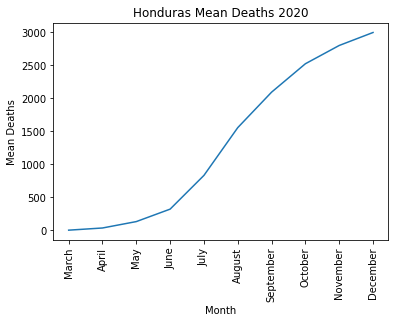

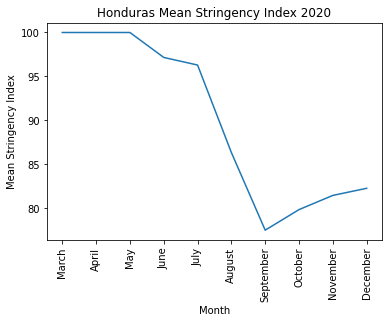

In [ ]:
covidSummaryYearPlot(2020,"Honduras")

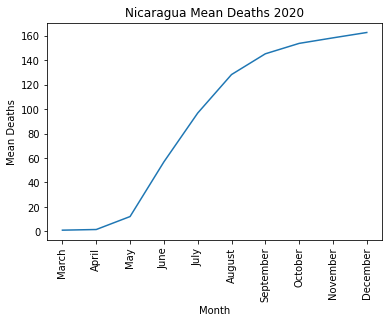

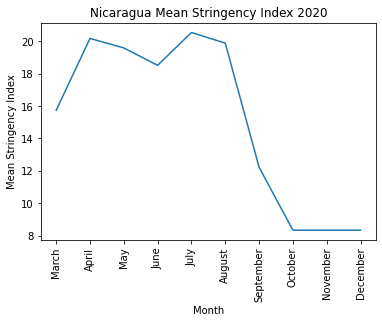

In [ ]:
covidSummaryYearPlot(2020,"Nicaragua")

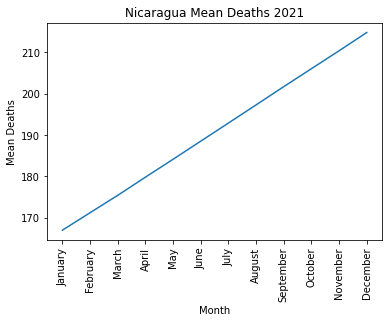

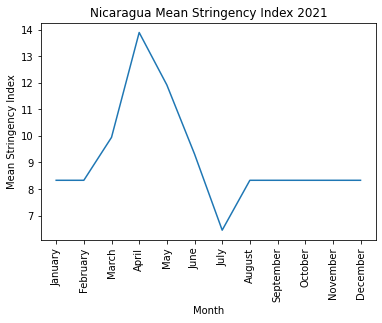

In [ ]:
covidSummaryYearPlot(2021,"Nicaragua")

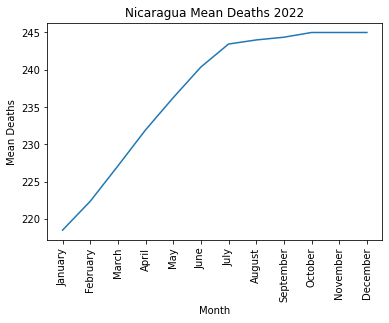

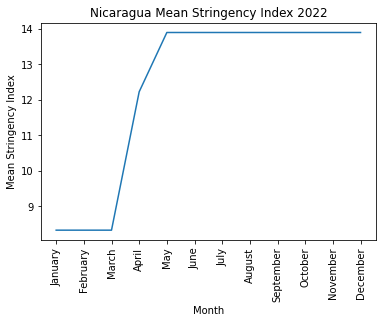

In [ ]:
covidSummaryYearPlot(2022,"Nicaragua")

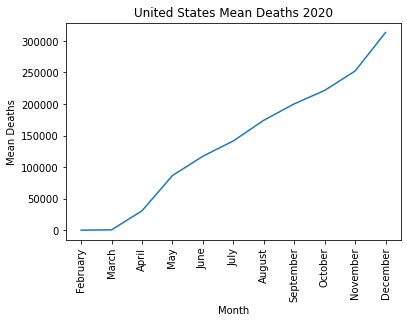

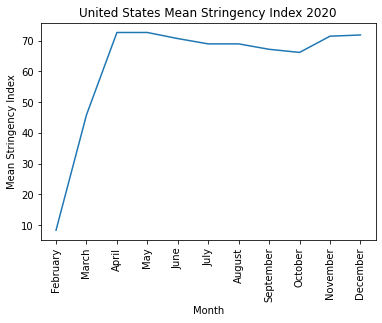

In [ ]:
covidSummaryYearPlot(2020,"United States")

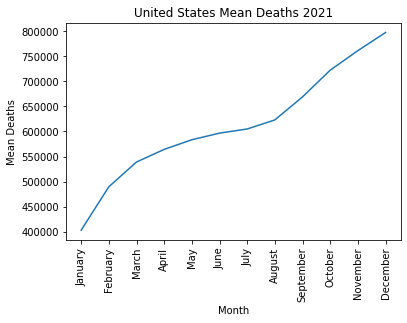

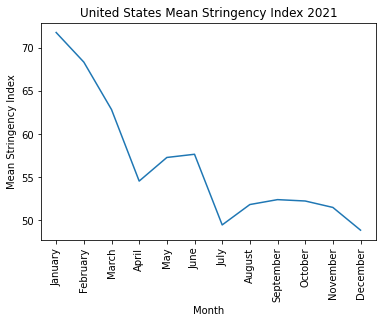

In [ ]:
covidSummaryYearPlot(2021,"United States")

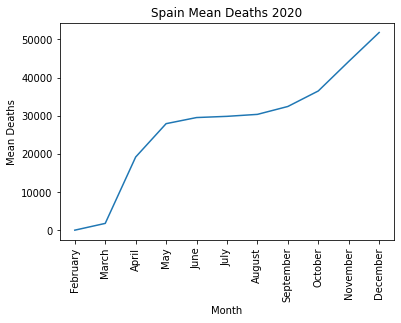

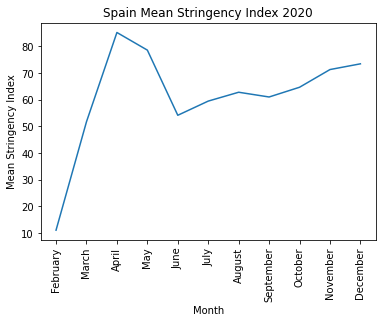

In [ ]:
covidSummaryYearPlot(2020,"Spain")

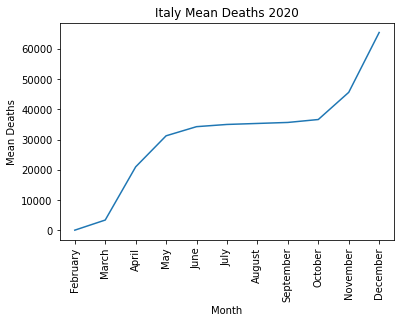

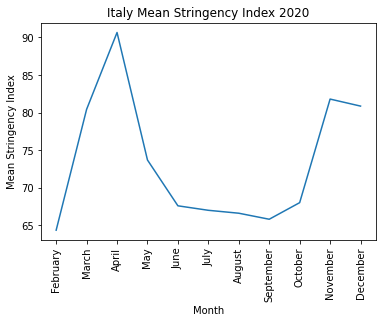

In [ ]:
covidSummaryYearPlot(2020,"Italy")